# MEDICIONES SOBRE TIERRA 27/05
nivel de prioridad: $\color{yellow}{Medio}$

$\textbf{Tarea de mariano:}$ Ver si la señal decae como $\frac{1}{r}$, tal como obtuvimos en labo 6

## DECAIMIENTO
En esta seccion vamos a analizar el decaimiento de la señal en funcion de la distancia. 

Siendo:
\begin{cases}
    A_{max}&=Max(|Amplitud|)\\
    E&=\sum(|Pot^2|)\\
\end{cases}

El objetivo es ver si la señal sigue decayendo segun :
\begin{equation}
    E=\frac{A}{r^p}\rightarrow E_{dB}=\underbrace{10\log_{10}(A)}_{a_o}-\underbrace{10p\log_{10}(r)}_{X}
\end{equation}

donde vamos a ajustar los datos obteidos con una funcion lineal y esperamos que $p\sim 1$



In [1]:
import numpy as np
#from scipy.fftpack import fft, fftfreq, fftshift
#from scipy import 
from sklearn import linear_model

from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter


import os

In [2]:
## Parámetros globales de la antena

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 

portadora = 'Fc8/'

In [3]:
if portadora== 'Fc7/':
    fc = 7.290e9 # frecuencia portadora
elif portadora== 'Fc8/':
    fc = 8.748e9
else:
    print('Error: portadora debe ser Fc7 o Fc8')

corte = 150
Nfft= 1024 # nro de frecs -> conviene que sea multiplo de 2 para calcular la FFT de manera eficiente. 
#Tiene que ser mayor a la longitud de la señal (285 para 2m, 439 para 3m)

In [4]:
##----------------PREPROCESAMIENTO DE LAS SEÑALES----------------------------##

sistema = 'windows'
alturas = ['1/','2/','3/','4/']
D = ['37cm','46.5cm','66cm','86.3cm']
N_med = np.zeros(len(alturas))

if sistema == 'ubuntu':
    ##----Ubuntu----##
    path_Scal = '/home/gordotony/Documents/UWB/mediciones_27_05/S1/'
    
    for i in range(len(alturas)):
        altura = alturas[i]
        # cuento el número de archivos en el directorio
        list = os.listdir(path_Scal+portadora+altura) # dir is your directory path
        N_med = int(len(list))
        print('# mediciones para altura', altura, '=', N_med)

        # miro la longitud de cada mediciòn
        L_data = np.zeros(N_med, dtype=int) # vector en donde guardo la long de cada medición


        for j in range(N_med[i]): 
            J = str(j+1)
            len_data_s1 = int(len(open(path_Scal+portadora+altura+J+'_S1.txt').readlines()))
            L_data[j] = len_data_s1
            print('long. medición #'+J+' =',len_data_s1)
    
    
    print('# mediciones x altura =', N_med)

    print('long de una medición:',np.shape(np.genfromtxt(path_Scal+portadora+altura+'1_S1.txt', delimiter=' ')))
    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#
    path_Scal = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_27_05\S1'
    
    for i in range(len(alturas)):
        altura = alturas[i]
        # cuento el número de archivos en el directorio
        list = os.listdir(path_Scal+'\\'+portadora+'\\'+altura) # dir is your directory path
        N_med = int(len(list))
        print('# mediciones para altura', D[i], '=', N_med)
   

        # miro la longitud de cada mediciòn
        L_data = np.zeros(N_med, dtype=int) # vector en donde guardo la long de cada medición

        for j in range(N_med): 
            J = str(j+1)
            len_data_s1 = int(len(open(path_Scal+'\\'+portadora+'\\'+altura+'\\'+J+'_S1.txt').readlines()))
            L_data[j] = len_data_s1
            print('longitud medición #'+J+' =',len_data_s1)
     

    
else:
    print('elegir sistema operativo')


## S1/FcX/N  donde, FcX es la portadora (X=7 u 8), 1<= N <= 4 son las 4 alturas en las que tomamos mediciones.
### dentro de cada carpeta N hay 10 mediciones (1<j<10): j_S1_Ncm.txt

# mediciones para altura 37cm = 10
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285
longitud medición #4 = 285
longitud medición #5 = 285
longitud medición #6 = 285
longitud medición #7 = 285
longitud medición #8 = 285
longitud medición #9 = 285
longitud medición #10 = 285
# mediciones para altura 46.5cm = 10
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285
longitud medición #4 = 285
longitud medición #5 = 285
longitud medición #6 = 285
longitud medición #7 = 285
longitud medición #8 = 285
longitud medición #9 = 285
longitud medición #10 = 285
# mediciones para altura 66cm = 10
longitud medición #1 = 285
longitud medición #2 = 285
longitud medición #3 = 285
longitud medición #4 = 285
longitud medición #5 = 285
longitud medición #6 = 285
longitud medición #7 = 285
longitud medición #8 = 285
longitud medición #9 = 285
longitud medición #10 = 285
# mediciones para altura 86.3cm = 10
longitud medición #1 = 285
longitud medició

In [5]:
#obs todos tienen len_data_s1 = 285 asi que lo puedo usar para la matriz
S1 = np.zeros((len(alturas),N_med,int(len_data_s1-1),11),dtype=float)


if sistema == 'ubuntu':
    for i0 in range(len(alturas)):
        altura = alturas[i0]
        for j0 in range(N_med):
            J0 = str(j0+1)
            S1[i0,j0,:,:] = np.genfromtxt(path_Scal+portadora+altura+J0+'_S1.txt', delimiter=' ')
        
elif sistema =='windows':
    for i0 in range(len(alturas)):
        altura = alturas[i0]
        for j0 in range(N_med):
            J0 = str(j0+1)
            S1[i0,j0,:,:] = np.genfromtxt(path_Scal+'\\'+portadora+'\\'+altura+'\\'+J0+'_S1.txt', delimiter=' ')
        
else:
    print('defnir sistema operativo')
    

print('dim S1:',np.shape(S1))

dim S1: (4, 10, 284, 11)


(284,)
(4, 284)


<function matplotlib.pyplot.show(close=None, block=None)>

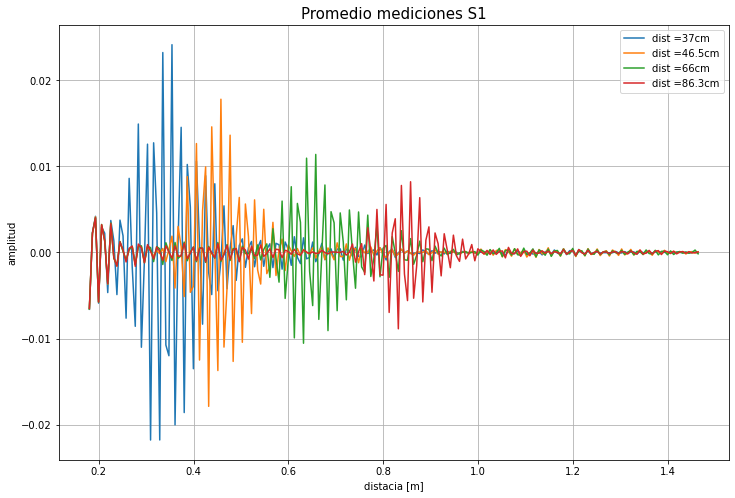

In [6]:
## Grafico S_cal(t) en banda pasante

#la distancia la tomamos igual en todas las mediciones (de 0.18m a 2m para esta tanda de mediciones)
dist = S1[0,0,:,0]
print(np.shape(dist))

#promedio los 10 disparos de cada medicion
S1_avg = np.mean(S1[:,:,:,1:],axis=3)

#promedio las 5 mediciones de S_cal:
S1_avg = np.mean(S1_avg[:,0:,:],axis=1)

#chequeo que me hayan quedado las mediciones para las 4 alturas 
print(np.shape(S1_avg))

#Graficamos en funcion de la distancia
plt.figure(figsize=(12,8))
for i0 in range(len(alturas)):
    altura = alturas[i0]
    plt.plot(dist[0:200], S1_avg[i0,0:200], label='dist ='+D[i0])
    
plt.grid('on')
plt.xlabel('distacia [m]')
plt.ylabel('amplitud')
plt.title('Promedio mediciones S1', fontsize = 15)
plt.legend(loc="best")
plt.show


## Banda base
no se si es necesario pero repito el procedimiento de labo 6. para ver el decaimiento analizo los datos que tomamos pasandolos a banda base.

In [10]:
%run to_baseband.ipynb
%run to_dB.ipynb

<function matplotlib.pyplot.show(close=None, block=None)>

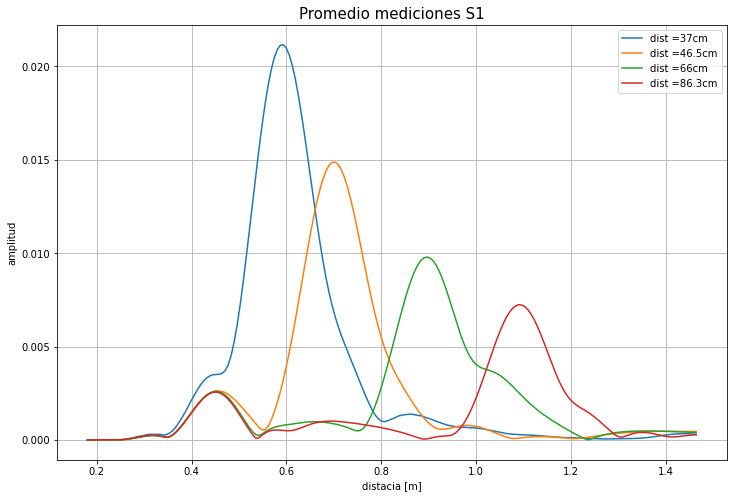

In [11]:
S1_BB = np.zeros_like(S1_avg, dtype=complex) 

for i0 in range(len(alturas)):
    S1_BB[i0,:] = to_baseband(S1_avg[i0,:],Ts,BW,fc)

plt.figure(figsize=(12,8))
for i0 in range(len(alturas)):
    plt.plot(dist[0:200], np.abs(S1_BB[i0,0:200]), label='dist ='+D[i0])

plt.grid('on')
plt.xlabel('distacia [m]')
plt.ylabel('amplitud')
plt.title('Promedio mediciones S1', fontsize = 15)
plt.legend(loc="best")
plt.show


Comentario: Por que si se supone que la señal en bada base es la portadora de mi pulso, el valor absoluto hace que me de corrida de donde tego los maximos en banda pasante? - queda para ver

[  0.         -12.51891132]


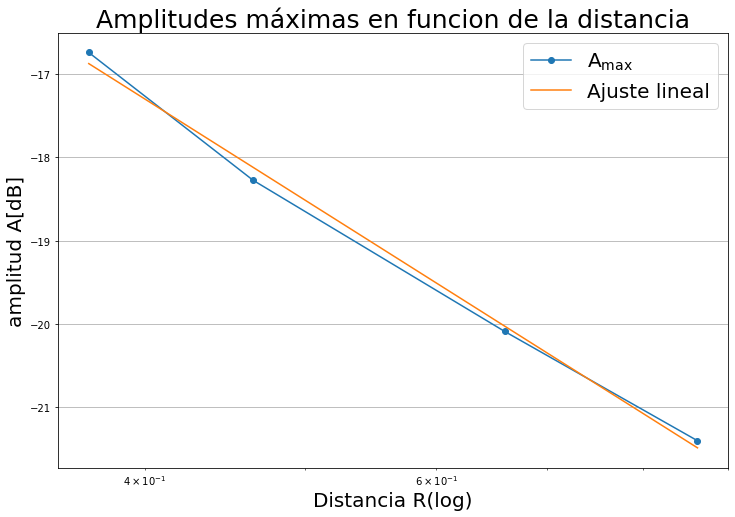

In [12]:
amax_bb = np.max(np.abs(S1_BB), axis=1)
h = (0.37, 0.465, 0.66, 0.863)

lr = linear_model.LinearRegression()
X = np.transpose(np.vstack((np.ones_like(h),np.log10(h))))
y = 10*np.log10(amax_bb)
lr.fit(X[:,:],y[:])
w = lr.coef_
print(w)

ajuste = lr.predict(X)

plt.figure(figsize=(12,8))
plt.title('Amplitudes máximas en funcion de la distancia', fontsize=25)
plt.xlabel('Distancia R(log)', fontsize=20)
plt.ylabel('amplitud A[dB]', fontsize=20)
plt.semilogx(h,10*np.log10(amax_bb),'-o',label='$\mathregular{A_{max}}$')
plt.semilogx(h,ajuste,label='Ajuste lineal')
#plt.plot(np.log10(h),10*np.log10(ebb), '-o')
#plt.plot(np.log10(h),ajuste)
plt.grid('on')
plt.legend(fontsize=20, loc="best")

## Conclusion

Con ese ajuste, el primer valor que obtenemos es la ordenada al origen (que esta bien que de 0 porque esta normalizado) y el segundo valor es X tal que
\begin{align}
    X=&-10*p*log_{10}(r)\\
    -11.96=&-10*p*log_{10}(r)\\
    \Rightarrow p\sim1.25\\
\end{align}